### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


(1) What is the independent variable? What is the dependent variable?

For these experiments, the independent variable is type of word list the subject is asked to read: congruent or incongruent.   The dependent variable is the time it takes (measured in seconds) for the subject to read the list aloud.

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

Let $ \mu_{C} $ be the **population mean** time the subjects take to read the *congruent* list of words.  Let $ \mu_{I}$ be the **population mean** time the subjects take to read the *incongruent* lists.  Then, our null hypothesis is that the type of list does not effect the reading speed, notationally, this is
$$
  H_{0}: \mu_{C} = \mu_{I}
$$
and the alternative, which we'd expect based on published work about this experiment, is that the average time for reading the congruent and incongruent lists is not the same, or
$$
  H_{A}: \mu_{C} \ne \mu_{I}
$$
Below, we can compute a T-test on the related groups, also called a *paired difference test* (since they are measurements of the same subjects), to test these hypotheses.  We'll use an $\alpha$ level of 0.05 to decide whether or not to reject $H_{0}$.  Our data is from a  **sample size** of 24 and we will assume that the sample is from a **normally distributed** population.  We've been given no specific **population parameters**, but we will assume that they are similar to the measures derived in the next section.

In [1]:
# Import packages
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# import data and report on a few rows
df = pd.read_csv('stroopdata.csv')
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [3]:
cong   = df['Congruent']
incong = df['Incongruent']

In [4]:
# report some descriptive statistics
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


The dataset contains measures of the time it takes participants to read congruent and incongruent lists of color names in seconds.  A common measure of central tencency is **mean** or _average_ reported as **mean** above.  For this sample, the mean for the congruent and incongruent list reading times is 14.051 and 22.016 seconds, respectively.

A common measure of variability of a sample is **standard deviation** shown as **std** above as 3.559 and 4.797 for the congruent and incongruent reading times, respectively. 

Another measure of variability is **interquartile range** which can be computed for these two groups (congruent,incongruent) as

In [5]:
(cong.quantile(0.75) - cong.quantile(0.25), incong.quantile(0.75) - incong.quantile(0.25) )

(4.3054999999999986, 5.33475)

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

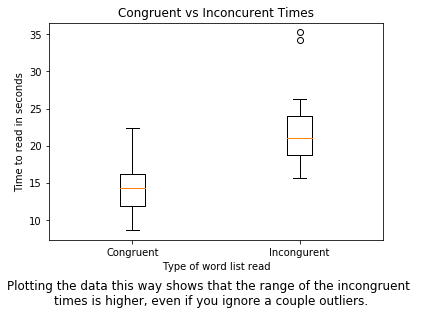

In [6]:
# Create side by side box plots 
bdata = (cong, incong)
labels = ('Congruent', 'Incongurent')
plt.boxplot(bdata)
plt.title("Congruent vs Inconcurent Times")
plt.xlabel("Type of word list read")
plt.ylabel("Time to read in seconds")
plt.xticks(np.arange(len(labels))+1,labels)
txt="Plotting the data this way shows that the range of the incongruent \n"+\
  "times is higher, even if you ignore a couple outliers."
plt.figtext(0.5, -0.1, txt, wrap=True, horizontalalignment='center', fontsize=12);
plt.show()

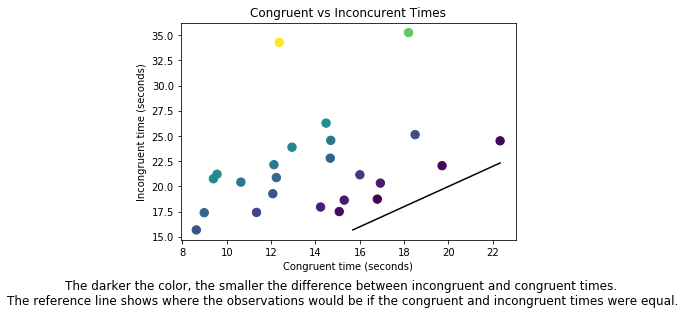

In [7]:
# Plot as a scatter plot using congruent=incongruent as a reference line, use color for degree of difference
miny = min(incong)
maxx = max(cong)
color = incong - cong
plt.scatter(cong, incong, c=color, s=70)
plt.plot([miny, maxx], [miny, maxx], c='black')   
plt.title("Congruent vs Inconcurent Times")
plt.xlabel("Congruent time (seconds)")
plt.ylabel("Incongruent time (seconds)")
txt="The darker the color, the smaller the difference between incongruent and congruent times. \n"+ \
  "The reference line shows where the observations would be if the congruent and incongruent times were equal."
plt.figtext(0.5, -0.1, txt, wrap=True, horizontalalignment='center', fontsize=12);

The box plots above show that the second and third quartiles for the incongruent and congurent times do not overlap, even though the raw ranges do.  The scatter plot shows that when you compare the incongruent and congruent times for the same subject, the incongruent time is always more.  Both plots clearly show two outliers in the incongruent measurements.

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

In [8]:
# Perform the statistical test here
stats.ttest_rel(cong, incong)

Ttest_relResult(statistic=-8.020706944109957, pvalue=4.103000585711178e-08)

I chose the [ttest_rel](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html#scipy.stats.ttest_rel) function from the scipy package because we're comparing the average times for the same subjects doing the different tests.  The test computed a p-value of 4.103e-08 or 0.00000004103 which is much smaller than the $\alpha$ level I chose of 0.05, a 95% confidence level.  

This set of data would have satisfied a $\alpha$ level of 0.00000005 or a confidence level of 99.999995%.

So, we can reject the null hypothesis, $H_{0}$, with a very high degree of confidence as expected given the amount of published research about the Stroop Effect.

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

I reviewed [this article](https://en.wikipedia.org/wiki/Stroop_effect#Variations) about the Stroop Effect and the commonly accepted expainations that rely on ‘race models’ of parallel processing within the brain make sense to me.  I believe that any task that required interpretation of information presented both pictorially (as an ink color, by some sort sort of diagram or topological arrangement) and semantically (in the form of text or numbers) would have a similar effect if the two representations (pictorial and semantic) where incongruent.  In the above referenced article in the section entitled **Variations**, several examples are listed.